In [1]:
import tensorflow as tf
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline
print (tf.__version__)

2.3.0


1.生成数据集

In [2]:
x_data = np.linspace(0,100,500,dtype=float)
np.random.seed(13)
y_data = 3.1234 * x_data + 2.98  #+ np.random.randn(*x_data.shape)* 0.001   #17.93


x_data= x_data.reshape(*x_data.shape,1)
y_data = y_data.reshape(*x_data.shape,1)

x_data = tf.cast(x_data, tf.float32)
y_data = tf.cast(y_data, tf.float32)

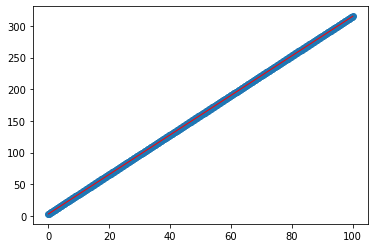

In [3]:
plt.scatter(x_data,y_data)
plt.plot(x_data,3.1234*x_data+2.98,'r',linewidth=1)

In [4]:
def model(x,w,b): 
    return tf.matmul(x,w)+b
    
def loss(x,y,w,b):
    err = model(x,w,b) - y
    s = tf.reduce_mean(tf.square(err))
    return s
    
def grad(x,y,w,b):
    with tf.GradientTape() as tape: 
        return tape.gradient(loss(x,y,w,b),[w,b])



In [5]:
w = tf.Variable(tf.random.normal([1,1],mean=0,stddev=10,seed=7),dtype=tf.float32)  
b = tf.Variable(tf.random.normal([1,1],mean=0,stddev=10,seed=7),dtype=tf.float32)
train_data = tf.data.Dataset.from_tensor_slices((x_data,y_data)).batch(500)

In [6]:
loss_list = []
epochs = 10
lr = 0.0001
for epoch in range(epochs):
    for step,(x,y) in enumerate(train_data):
        _loss = loss(x,y,w,b)
        loss_list.append(_loss)
        _w,_b = grad(x,y,w,b)
        w.assign_sub(lr*_w)
        b.assign_sub(lr*_b)
        print("Training Epoch: %02d ,Step:%03d ,loss=%.6f" % ((epoch+1),(step+1),_loss))   
    plt.plot(x_data,w.numpy()*x_data+b.numpy())


InternalError: Blas GEMV launch failed:  m=1, n=500 [Op:MatMul]

In [ ]:
print (w.numpy())
print (b.numpy())

In [ ]:
plt.scatter(x_data,y_data,label='Original data')
plt.plot(x_data,2.98+3.1234*x_data,label='Object line',color='g',linewidth=3)
plt.plot(x_data,x_data*w.numpy()+b.numpy(),label='Fitten line',color='r',linewidth=1)
plt.legend(loc=2)

In [ ]:
plt.plot(loss_list)

In [ ]:
print (w.numpy() * 5.79 + b.numpy())
print (3.1234 * 5.79 + 2.98)